# Image Classification with CNN on Fashion Dataset

In this notebook, we explore how to build and train a **Convolutional Neural Network (CNN)** to classify images from the **Fashion MNIST dataset**. Fashion MNIST consists of grayscale images of 10 different clothing items, and the goal is to predict the category of the clothing item based on the image input. CNNs are especially suited for image classification tasks as they can automatically learn spatial hierarchies and patterns in visual data.

### Problem Overview

The **Fashion MNIST dataset** is a popular dataset containing 60,000 training images and 10,000 test images of 10 different classes, including T-shirts, dresses, sneakers, and bags. The task is to predict the category of each image based on its pixel values. CNNs have proven to be highly effective for this type of task, as they can detect features such as edges, textures, and shapes within the images.

### Objectives

1. **Data Preprocessing**: Load and preprocess the dataset, including scaling the image data and preparing it for input into the CNN.
2. **Model Building**: Design a CNN architecture with multiple convolutional and pooling layers to extract features from the images, followed by fully connected layers for classification.
3. **Training**: Train the model using the preprocessed data and optimize its parameters for accurate predictions.
4. **Evaluation**: Evaluate the performance of the model on the test set, using metrics such as accuracy and loss.
5. **Conclusion**: Analyze the model’s predictions, its strengths and weaknesses, and suggest potential improvements.

In [2]:
!pip install -q -U tensorflow>=1.8.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


## Import Libraries and Load Dataset

In [3]:
# Import necessary libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

In [4]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


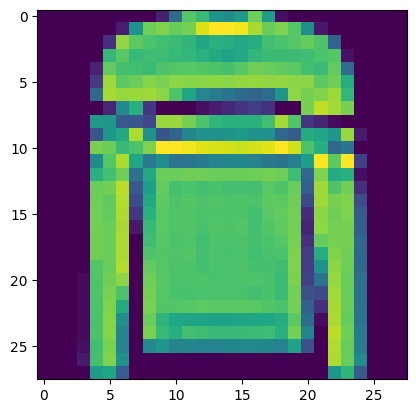

In [5]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Image index, can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization

Normalize the data dimensions so that they are of approximately the same scale.


In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets

- Training data - used for training the model
- Validation data - used for tuning the hyperparameters and evaluate the models
- Test data - used to test the model after the model has gone through initial vetting by the validation set.

In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the model architecture

There are two APIs for defining a model in Keras:

- Sequential model API
- Functional API

In this notebook we are using the Sequential model API.

**We will be using some of these Keras APIs in defining the model** :

- Conv2D() link text - create a convolutional layer
- Pooling() link text - create a pooling layer
- Dropout() link text - apply drop out


In [9]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

## Configure the learning process with compile() API before training the model.

It receives three arguments:

- An optimizer
- A loss function
- A list of metrics

In [10]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Train the model with fit() API.

We use the ModelCheckpoint API to save the model after every epoch. We Set "save_best_only = True" to save only when the validation accuracy improves.

In [11]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)
model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])


Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6929 - loss: 0.8353
Epoch 1: val_loss improved from inf to 0.37538, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 83s 93ms/step - accuracy: 0.6930 - loss: 0.8351 - val_accuracy: 0.8688 - val_loss: 0.3754
Epoch 2/10
859/860 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8431 - loss: 0.4329
Epoch 2: val_loss improved from 0.37538 to 0.32326, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - accuracy: 0.8431 - loss: 0.4329 - val_accuracy: 0.8884 - val_loss: 0.3233
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8625 - loss: 0.3785
Epoch 3: val_loss improved from 0.32326 to 0.29610, saving model to model.weights.best.keras
860/860 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.8625 - loss: 0.3785 - val_accuracy: 0.8926 - val_loss: 0.2961
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8739 - loss: 0.3419
Epoch 4: val_loss im

In [12]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.keras')


## Test Accuracy

In [13]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9110999703407288


## Visualize the results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


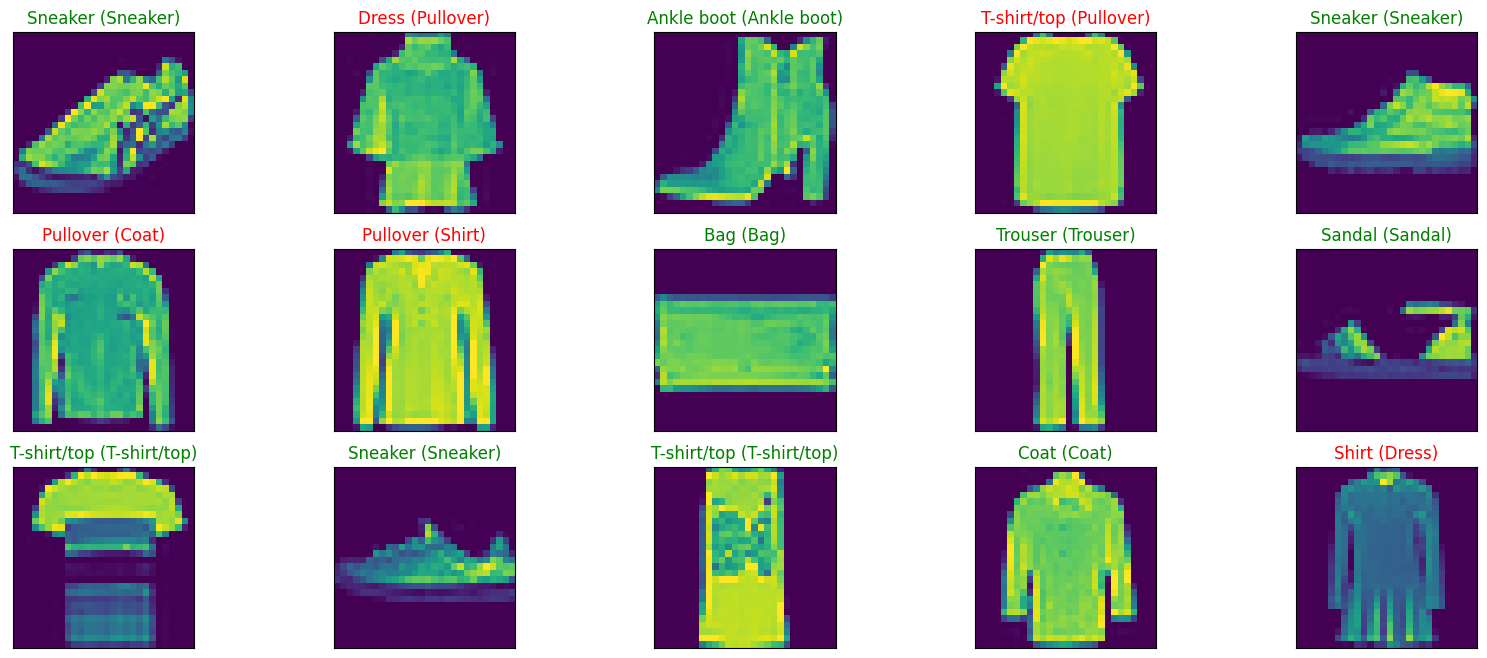

In [14]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))